# Mini-Projet : Classification des Mobiles avec Streamlit

### Import des bibliothèques nécessaires

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle
import streamlit as st

#### Ce projet a pour but de :

- Charger et analyser le dataset mobile_prices.csv
- Entraîner un modèle de classification
- Sauvegarder le modèle
- Déployer une application web interactive avec Streamlit

### Partie 1: Exploration et préparation des données

In [43]:
# Chargement du dataset
df = pd.read_csv('mobile_prices.csv')

# Affichage des premières lignes pour comprendre la structure
print("Aperçu des données:")
print(df.head())

Aperçu des données:
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_

In [45]:
# Informations sur le dataset
print("\nInformations sur le dataset:")
print(df.info())
print("\nStatistiques descriptives:")
print(df.describe())


Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 no


Valeurs manquantes par colonne:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


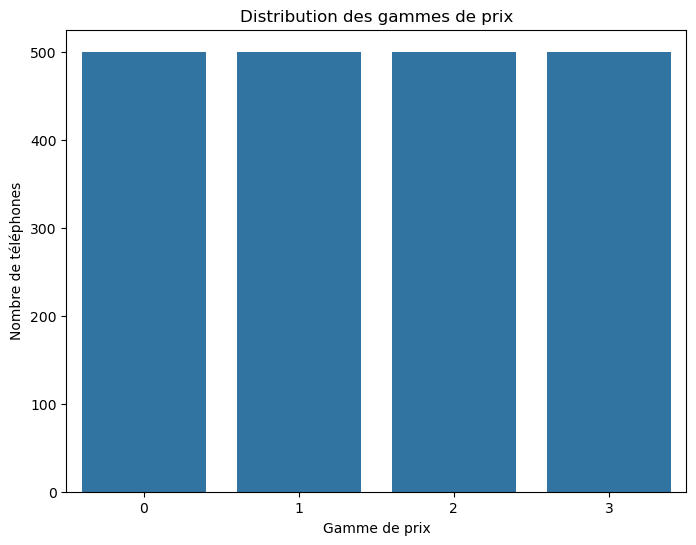

In [47]:
# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne:")
print(df.isnull().sum())

# Visualisation de la distribution des classes
plt.figure(figsize=(8, 6))
sns.countplot(x='price_range', data=df)
plt.title('Distribution des gammes de prix')
plt.xlabel('Gamme de prix')
plt.ylabel('Nombre de téléphones')
plt.show()


In [49]:
# Séparation des features et de la cible
X = df.drop('price_range', axis=1)
y = df['price_range']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Partie 2: Entraînement du modèle

In [52]:
# Utilisation d'un RandomForest avec recherche d'hyperparamètres
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Récupération du meilleur modèle
best_rf = grid_search.best_estimator_
print(f"\nMeilleurs paramètres: {grid_search.best_params_}")



Meilleurs paramètres: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


### Partie 3: Évaluation du modèle


Rapport de classification:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.89      0.86      0.87        91
           2       0.80      0.86      0.83        92
           3       0.93      0.88      0.91       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400


Matrice de confusion:


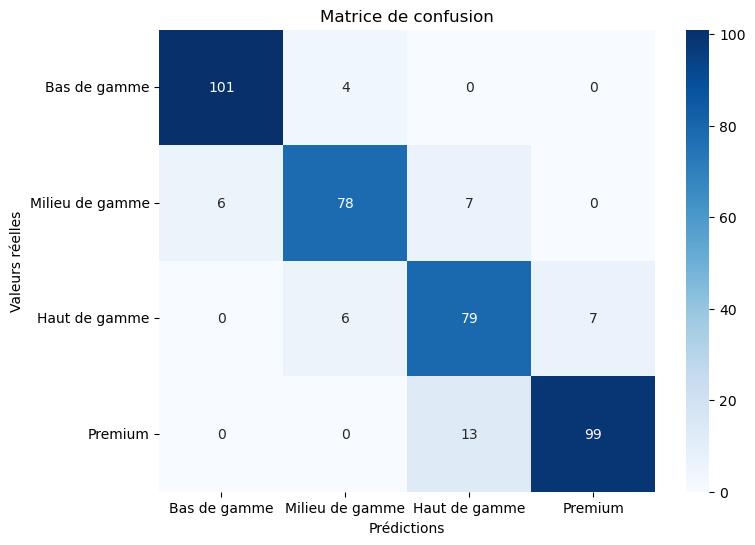


Précision du modèle: 0.8925


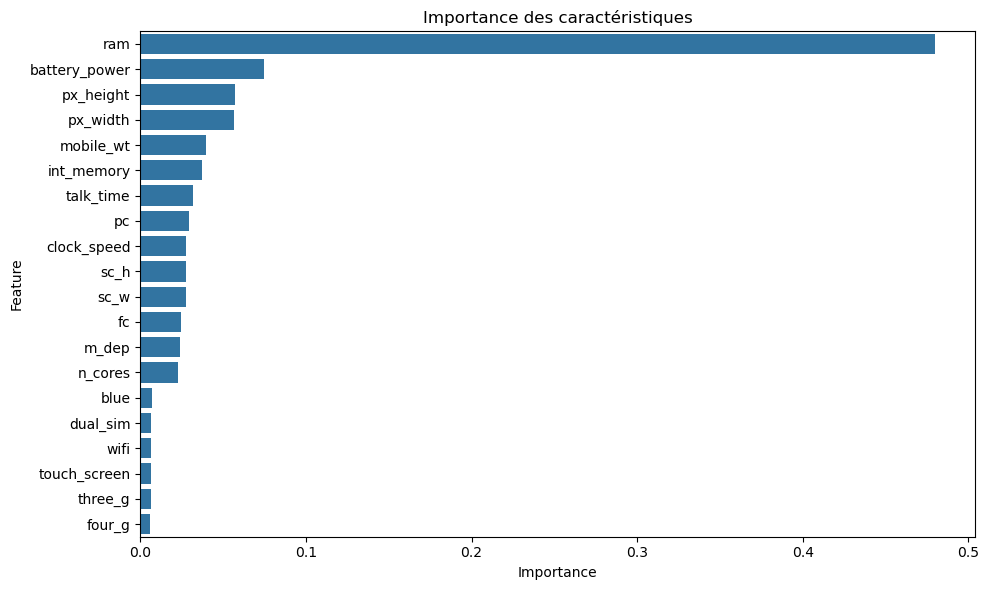

In [32]:
y_pred = best_rf.predict(X_test_scaled)

print("\nRapport de classification:")
print(classification_report(y_test, y_pred))

print("\nMatrice de confusion:")
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Bas de gamme', 'Milieu de gamme', 'Haut de gamme', 'Premium'],
            yticklabels=['Bas de gamme', 'Milieu de gamme', 'Haut de gamme', 'Premium'])
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.title('Matrice de confusion')
plt.show()

print(f"\nPrécision du modèle: {accuracy_score(y_test, y_pred):.4f}")

# Importance des caractéristiques
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importance des caractéristiques')
plt.tight_layout()
plt.show()

# Sauvegarde du modèle et du scaler pour le déploiement
with open('mobile_price_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)
    
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)